## UAS MACHINE LEARNING

## NAMA  : Wira Dwi Susanto
## NIM   : 17.01.53.0053
## Kelas : A1

# CLUSTERING

# Jumlah Penduduk Hasil Proyeksi Menurut Provinsi dan Jenis Kelamin (Ribu Jiwa), 2018-2020
# https://www.bps.go.id/indicator/12/1886/1/jumlah-penduduk-hasil-proyeksi-menurut-provinsi-dan-jenis-kelamin.html

# Pertama, lakukan *import* *library*/kebutuhan yang diperlukan di Python

In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Untuk import library yang diperlukan di Python

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Import datasetnya menggunakan fungsi pandas pd.read_excel()

In [23]:
import_datanya = pd.read_excel("Jumlah Penduduk Hasil Proyeksi Menurut Provinsi dan Jenis Kelamin New.xlsx", engine='openpyxl')

# Coba kita tampilkan data dari dataset 5 paling teratas

In [24]:
import_datanya.head(5)

,Provinsi,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
0,ACEH,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,5388.1,5316.3,5243.4
1,SUMATERA UTARA,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,14798.4,14639.4,14476.0
2,SUMATERA BARAT,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,5545.7,5479.5,5411.8
3,RIAU,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,6951.2,6835.1,6717.6
4,JAMBI,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,3604.2,3566.2,3527.1


# Coba menampilkan informasi datatype pada dataset, terdiri dari object dan float64

In [25]:
import_datanya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  34 non-null     object 
 1   2020      34 non-null     float64
 2   2019      34 non-null     float64
 3   2018      34 non-null     float64
 4   2020.1    34 non-null     float64
 5   2019.1    34 non-null     float64
 6   2018.1    34 non-null     float64
 7   2020.2    34 non-null     float64
 8   2019.2    34 non-null     float64
 9   2018.2    34 non-null     float64
dtypes: float64(9), object(1)
memory usage: 3.1+ KB


# Perlu dilakukan drop pada atribut dataset yang memiliki value NaN (tidak mempunyai nilai). Untuk melakukannya, gunakan fungsi dropna()

In [26]:
import_datanya.dropna()

,Provinsi,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
0,ACEH,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,5388.1,5316.3,5243.4
1,SUMATERA UTARA,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,14798.4,14639.4,14476.0
2,SUMATERA BARAT,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,5545.7,5479.5,5411.8
3,RIAU,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,6951.2,6835.1,6717.6
4,JAMBI,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,3604.2,3566.2,3527.1
5,SUMATERA SELATAN,4358.0,4308.1,4257.1,4242.8,4189.1,4134.4,8600.8,8497.2,8391.5
6,BENGKULU,1015.2,1004.5,993.6,979.1,967.2,955.0,1994.3,1971.8,1948.6
7,LAMPUNG,4364.3,4327.8,4289.9,4170.6,4129.8,4087.8,8534.8,8457.6,8377.7
8,KEP. BANGKA BELITUNG,756.9,748.5,739.9,712.9,702.6,692.1,1469.8,1451.1,1432.1
9,KEP. RIAU,1179.0,1144.7,1111.0,1130.5,1096.9,1063.8,2309.5,2241.6,2174.8


# Gunakan fungsi shape untuk menampilkan banyaknya elemen di setiap dimensi array

In [27]:
import_datanya.shape

(38, 10)

# Hapus kolom variable yang tidak diperlukan

In [28]:
data = import_datanya.drop(['Provinsi'], axis = 1)
data.head()

,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,5388.1,5316.3,5243.4
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,14798.4,14639.4,14476.0
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,5545.7,5479.5,5411.8
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,6951.2,6835.1,6717.6
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,3604.2,3566.2,3527.1


# Lakukan cleansing pada data yang masih mempunyai value NaN (untuk memastikan). Kita akan menghapusnya.

In [29]:
data.dropna(how='any') 

,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,5388.1,5316.3,5243.4
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,14798.4,14639.4,14476.0
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,5545.7,5479.5,5411.8
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,6951.2,6835.1,6717.6
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,3604.2,3566.2,3527.1
5,4358.0,4308.1,4257.1,4242.8,4189.1,4134.4,8600.8,8497.2,8391.5
6,1015.2,1004.5,993.6,979.1,967.2,955.0,1994.3,1971.8,1948.6
7,4364.3,4327.8,4289.9,4170.6,4129.8,4087.8,8534.8,8457.6,8377.7
8,756.9,748.5,739.9,712.9,702.6,692.1,1469.8,1451.1,1432.1
9,1179.0,1144.7,1111.0,1130.5,1096.9,1063.8,2309.5,2241.6,2174.8


In [30]:
X = pd.DataFrame(data.dropna(how='any'))
X.head()

,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,5388.1,5316.3,5243.4
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,14798.4,14639.4,14476.0
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,5545.7,5479.5,5411.8
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,6951.2,6835.1,6717.6
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,3604.2,3566.2,3527.1


# Menggambarkan deskripsi dataset

In [31]:
X.describe()

,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,3980.500000,3941.917647,3902.435294,3949.023529,3908.420588,3867.011765,7929.511765,7850.350000,7769.458824
std,5628.208156,5584.977673,5540.622058,5626.802869,5582.539309,5537.288237,11253.681246,11166.159675,11076.519958
min,374.100000,368.000000,361.800000,334.200000,327.600000,321.000000,708.400000,695.600000,682.800000
25%,1204.150000,1176.200000,1148.600000,1156.225000,1128.525000,1101.100000,2360.350000,2304.725000,2249.700000
50%,2046.050000,2021.350000,1996.250000,2047.850000,2021.100000,1994.050000,4093.900000,4042.450000,3990.350000
75%,4149.675000,4105.325000,4052.825000,3977.450000,3931.875000,3885.250000,8138.900000,8051.975000,7962.675000
max,25111.200000,24845.400000,24576.500000,24454.000000,24177.700000,23899.000000,49565.200000,49023.200000,48475.500000


# Kita coba gunakan fungsi tail() untuk melihat ekor data pada dataset yang digunakan.

In [32]:
X.tail()

,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2
29,692.2,682.8,673.3,686.0,676.4,666.8,1378.1,1359.2,1340.1
30,900.4,891.4,882.2,886.7,877.1,867.3,1787.1,1768.5,1749.5
31,637.3,629.3,621.2,615.0,606.3,597.5,1252.3,1235.7,1218.8
32,518.1,506.4,494.9,468.0,457.2,446.5,986.0,963.6,941.4
33,1777.7,1756.1,1734.0,1615.4,1591.0,1566.2,3393.1,3347.1,3300.2


# Di sini akan menebak jumlah cluster yang dibutuhkan

In [33]:
scr=[]
for i in range (1, 34):
    score = KMeans(n_clusters=i).fit(X).score(X)
    print(score)
    scr.append(score)

-18515381609.721764
-2141223075.8806453
-939600036.8880953
-515142115.15309525
-292175883.20076925
-160098114.99276927
-99419453.68776923
-57386372.58805553
-40780947.45654761
-28999625.345249996
-20058757.22904762
-11017280.466380954
-7461297.541880952
-4823437.128166665
-3630034.796499999
-2630751.187333332
-2125730.1183333327
-1628981.0516666665
-1389373.0766666667
-924245.388333333
-739077.9116666663
-560226.5566666664
-398319.1866666664
-305003.58166666643
-224743.84333333306
-163080.29999999984
-110501.57999999989
-62225.85999999998
-42072.46999999998
-30205.33999999996
-20945.78500000001
-12605.38500000001
-9116.180000000042


# Ambil nilai di tengah-tengah lekukan untuk nilai cluster yakni = 5. Kita gambarkan menggunakan matplotlib

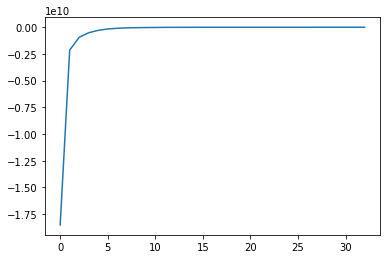

In [34]:
plt.plot(scr)

# Ubah variabel yang sebelumnya berbentuk dataframe menjadi sebuah array

In [35]:
x_array = np.array(X)
print(x_array)

[[ 2691.8  2656.1  2619.9  2696.3  2660.2  2623.5  5388.1  5316.3  5243.4]
 [ 7392.7  7312.2  7229.4  7405.7  7327.2  7246.5 14798.4 14639.4 14476. ]
 [ 2760.6  2727.   2692.6  2785.1  2752.5  2719.3  5545.7  5479.5  5411.8]
 [ 3553.2  3497.   3440.   3398.   3338.1  3277.6  6951.2  6835.1  6717.6]
 [ 1831.3  1813.5  1795.2  1772.9  1752.7  1731.9  3604.2  3566.2  3527.1]
 [ 4358.   4308.1  4257.1  4242.8  4189.1  4134.4  8600.8  8497.2  8391.5]
 [ 1015.2  1004.5   993.6   979.1   967.2   955.   1994.3  1971.8  1948.6]
 [ 4364.3  4327.8  4289.9  4170.6  4129.8  4087.8  8534.8  8457.6  8377.7]
 [  756.9   748.5   739.9   712.9   702.6   692.1  1469.8  1451.1  1432.1]
 [ 1179.   1144.7  1111.   1130.5  1096.9  1063.8  2309.5  2241.6  2174.8]
 [ 5267.8  5241.1  5212.6  5308.6  5262.9  5215.4 10576.4 10504.1 10428. ]
 [25111.2 24845.4 24576.5 24454.  24177.7 23899.  49565.2 49023.2 48475.5]
 [17237.3 17144.9 17048.2 17500.9 17407.6 17310.2 34738.2 34552.5 34358.5]
 [ 1935.4  1911.3  1887.3

# Lakukan scaling data dari array

In [36]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.09369328, 0.09347807, 0.09325327, 0.09793199, 0.09780252,
        0.09765459, 0.09578401, 0.09561203, 0.09542462],
       [0.28372768, 0.28369843, 0.28361285, 0.29318236, 0.29348305,
        0.2937272 , 0.28839384, 0.28852664, 0.28860475],
       [0.09647453, 0.09637461, 0.09625558, 0.10161361, 0.10167253,
        0.1017177 , 0.09900976, 0.09898898, 0.09894817],
       [0.12851547, 0.1278322 , 0.12712113, 0.12702427, 0.12622589,
        0.12539656, 0.1277775 , 0.12703921, 0.12627033],
       [0.05890747, 0.05905447, 0.05919545, 0.05964809, 0.05975237,
        0.05983968, 0.05927118, 0.05939877, 0.05951327],
       [0.1610496 , 0.16096889, 0.16086509, 0.16204944, 0.16190708,
        0.16173552, 0.16154148, 0.16143156, 0.16129451],
       [0.02591654, 0.02600358, 0.02609159, 0.02673737, 0.0268175 ,
        0.02688947, 0.02631978, 0.02640727, 0.02648522],
       [0.16130428, 0.16177372, 0.16221964, 0.15905605, 0.15942072,
        0.1597591 , 0.1601906 , 0.16061216, 0.16100576],


# Tentukan jumlah cluster-nya, misalnya di sini ada 5 cluster
# Gunakan fungsi library K-Means pada Python

In [37]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

# Cari nilai pusat/centroid dari masing masing cluster

In [38]:
print(kmeans.cluster_centers_)

[[ 2393.15833333  2362.5         2331.325       2356.3
   2324.675       2292.575       4749.45        4687.175
   4623.90833333]
 [18479.75       18382.05       18279.1        18867.3
  18766.6        18661.05       37347.05       37148.65
  36940.2       ]
 [ 5381.53333333  5328.8         5274.53333333  5334.23333333
   5276.55        5217.46666667 10715.75       10605.35
  10492.01666667]
 [25111.2        24845.4        24576.5        24454.
  24177.7        23899.         49565.2        49023.2
  48475.5       ]
 [  943.01538462   930.22307692   917.30769231   907.47692308
    893.84615385   880.12307692  1850.47692308  1824.09230769
   1797.43846154]]


# Tampilkan hasil clustering dan tambahkan kolom clustering ke dalam dataframe

In [39]:
print(kmeans.labels_)
    
# Menambahkan kolom "cluster" dalam dataframe
X["cluster"] = kmeans.labels_
X.head()

[0 2 0 0 0 2 4 2 4 4 2 3 1 0 1 2 0 0 0 0 4 0 0 4 4 4 2 4 4 4 4 4 4 0]


,2020,2019,2018,2020.1,2019.1,2018.1,2020.2,2019.2,2018.2,cluster
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,5388.1,5316.3,5243.4,0
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,14798.4,14639.4,14476.0,2
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,5545.7,5479.5,5411.8,0
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,6951.2,6835.1,6717.6,0
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,3604.2,3566.2,3527.1,0


# Coba lakukan visualisasi pembagian hasil cluster

(array([12.,  0.,  2.,  0.,  0.,  6.,  0.,  1.,  0., 13.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

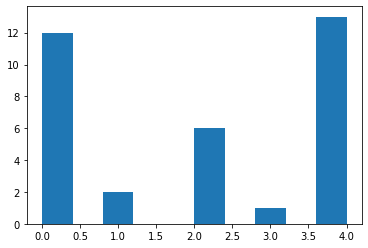

In [40]:
plt.hist(X["cluster"])

# Lakukan visualisasi pengelompokan cluster. Untuk melakukannya, bisa digunakan fungsi seaborn pada Python dan maka hasilnya akan seperti di bawah ini.

<Figure size 432x288 with 0 Axes>

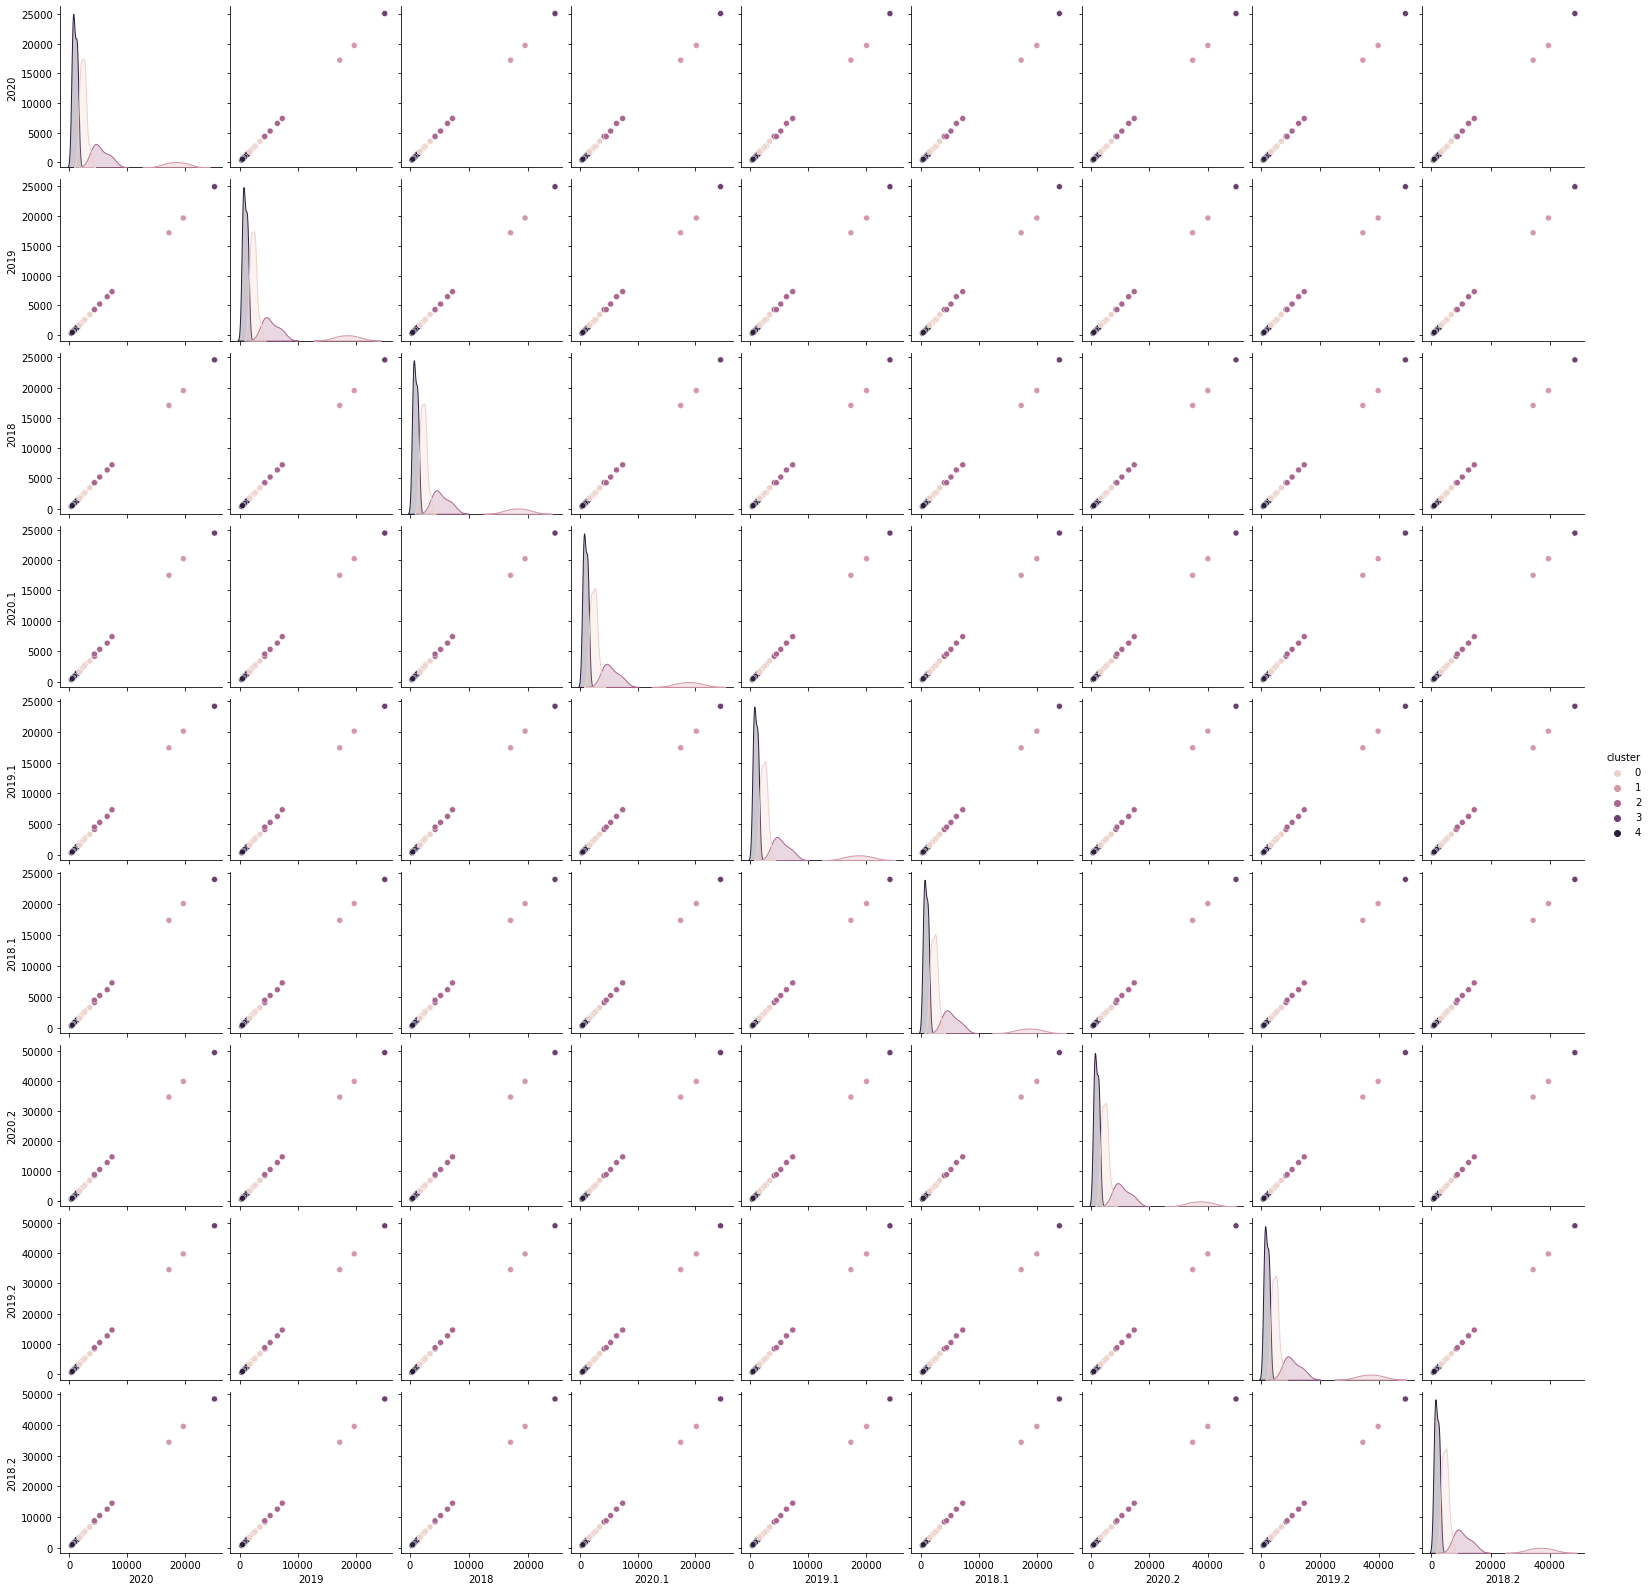

In [41]:
plt.figure()
sns.pairplot(X, hue="cluster", dropna=True)
plt.show()

# Dari gambar di atas, maka dapat kita lihat bahwa dari data Jumlah Penduduk Hasil Proyeksi Menurut Provinsi dan Jenis Kelamin (Ribu Jiwa), 2018-2020 telah dicluster menjadi 5